In [2]:
import numpy as np
import imageio.v3 as imageio
import matplotlib.pyplot as plt

#### Funções

In [3]:
def RMSE(H, H_hat):
    return np.sqrt(((H.astype(np.int32) - H_hat.astype(np.int32))**2).mean())

In [4]:
def get_D(input_image):
    P, Q = input_image.shape

    result = np.zeros((P,Q))
    for u in range(P):
        for v in range(Q):
            result[u][v] = np.sqrt( ( u - P/2)**2 + ( v - Q/2)**2 )

    return result

In [5]:
def lowpass_filter(input_image, radius):
    D_matrix = get_D(input_image)

    P, Q = input_image.shape

    result = np.zeros((P,Q))
    for i in range(P):
        for j in range(Q):
            if D_matrix[i,j] <= radius:
                result[i,j] = 1
    
    return result

In [6]:
def highpass_filter(input_image, radius):
    D_matrix = get_D(input_image)

    P, Q = input_image.shape

    result = np.zeros((P,Q))
    for i in range(P):
        for j in range(Q):
            if D_matrix[i,j] > radius:
                result[i,j] = 1
    
    return result

In [14]:
def bandstop_filter(input_image, radius0, radius1):
    D_matrix = get_D(input_image)

    P, Q = input_image.shape

    result = np.ones((P,Q))
    for i in range(P):
        for j in range(Q):
            if radius0 >= D_matrix[i,j] >= radius1 :
                result[i,j] = 0
    
    return result

In [8]:
def Laplacian_highpass_filter(input_image, radius0, radius1):
    P, Q = input_image.shape

    result = np.zeros((P,Q))
    for u in range(P):
        for v in range(Q):
            result[u][v] =  -4 * (np.pi**2) * (( u - P/2)**2 + ( v - Q/2)**2 )
    
    return result

In [9]:
def gaussian_lowpass_filter(input_image, rho1, rho2):
    # acknowledged as blur
    P, Q = input_image.shape

    result = np.zeros((P,Q))
    for u in range(P):
        for v in range(Q):
            x =  ((( u - P/2)**2) / (2*rho1**2)) + ((( v - Q/2)**2) / (2*rho2**2))
            result[u][v] = np.e**(-x)
    return result

In [10]:
def generate_freq_domain(input_image):
    freq_domain = np.fft.fft2(input_image)
    return np.fft.fftshift(freq_domain)

In [11]:
def restore_image(H):
    result = np.fft.ifftshift(H)
    result = np.real(np.fft.ifft2(result))

    result *= 255/result.max()

    return result

#### Entrada

In [12]:
input_image = input().rstrip()
reference_image = input().rstrip()
filter_index = int(input())

input_image = imageio.imread(input_image)
reference_image = imageio.imread(reference_image)

param_1 = 0; param_2 = 0;

if filter_index < 2: # Radius for filters 0 and 1
    param_1 = np.float32(input()) 
elif filter_index != 3: # Parameters for filters 2 and 4
    param_1 = np.float32(input())
    param_2 = np.float32(input())

# a) Generate the Fourier Spectrum ( F ( I ) ) for the input image I.
fourier_spectrum = generate_freq_domain(input_image)
result = np.zeros(fourier_spectrum.shape)

# b) Filter F ( I ) multiplying it by the input filter Mi.
if filter_index == 0:
    input_filter = lowpass_filter(input_image, param_1)
    result = np.multiply(fourier_spectrum, input_filter)
elif filter_index == 1:
    input_filter = highpass_filter(input_image, param_1)
    result = np.multiply(fourier_spectrum, input_filter)
elif filter_index == 2:
    input_filter = bandstop_filter(input_image, param_1, param_2)
    result = np.multiply(fourier_spectrum, input_filter)
elif filter_index == 3:
    input_filter = Laplacian_highpass_filter(input_image)
    result = np.multiply(fourier_spectrum, input_filter)
else:
    input_filter = gaussian_lowpass_filter(input_image, param_1, param_2)
    result = np.multiply(fourier_spectrum, input_filter)

# c) Generate the filtered image G back in the space domain.
restored_image = restore_image(result)


ValueError: invalid literal for int() with base 10: ''

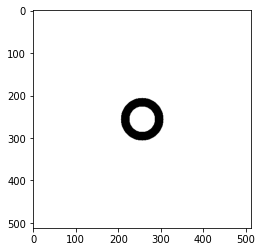

In [15]:
input_image = imageio.imread("test_cases_data/apollo17.png")

input_filter = bandstop_filter(input_image, 50, 30)

fourier_spectrum = generate_freq_domain(input_image)
freq_domain = np.fft.fft2(input_image)

plt.imshow(input_filter, cmap='gray')